To be continued...

In [1]:
from kalman import FilEst
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
%matplotlib inline 

if __name__=="__main__":
    ins2=FilEst(tns=63, val=0.00003)
    ins2.hmm(0)
    ins2.kalman(0)
    ins2.Estimate(freq=1000, period=189, lam=0.94, Kalman=True)

#### No  update only filtering 

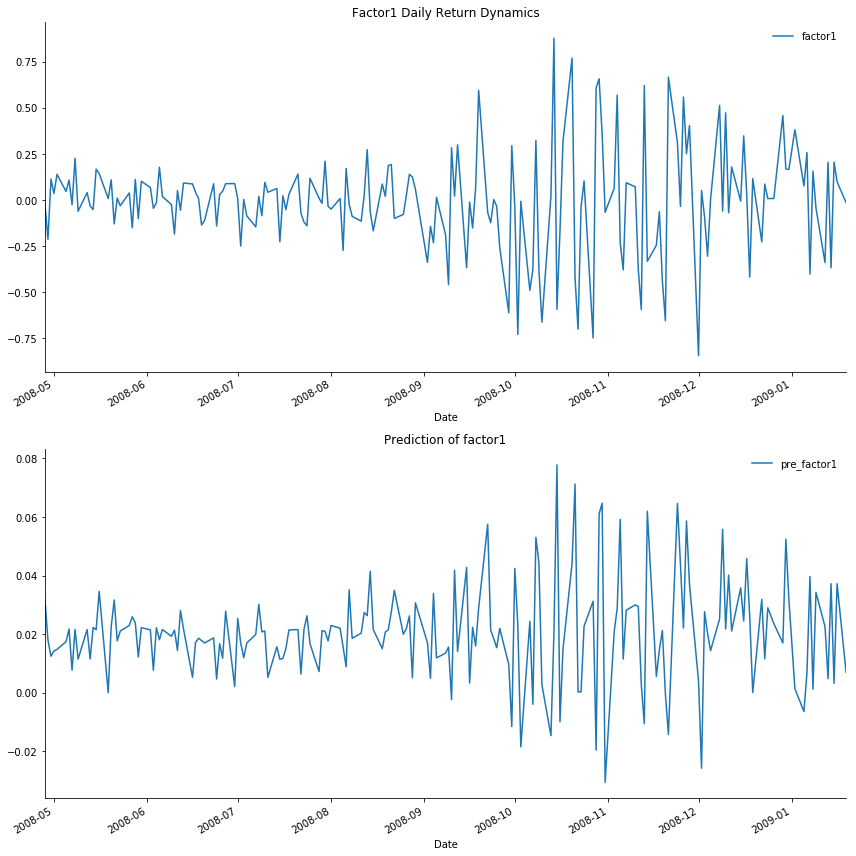

In [2]:
df_r=pd.read_excel('r.xlsx')
df_pr=pd.read_excel('pr.xlsx')
for _ in df_pr.columns[1:]: 
    df_r['pre_'+_]=df_pr[_]
df_r.set_index('Date', inplace=True)

#factor 1 
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
df_r['factor1'].plot(ax=axes[0], title='Factor1 Daily Return Dynamics')
df_r['pre_factor1'].plot(ax=axes[1], title='Prediction of factor1') 
for i in [0,1]: 
    axes[i].spines['top'].set_visible(False) 
    axes[i].spines['right'].set_visible(False)
    axes[i].legend(frameon=False);
plt.tight_layout()
plt.savefig('./output/fig/fact1prediction')

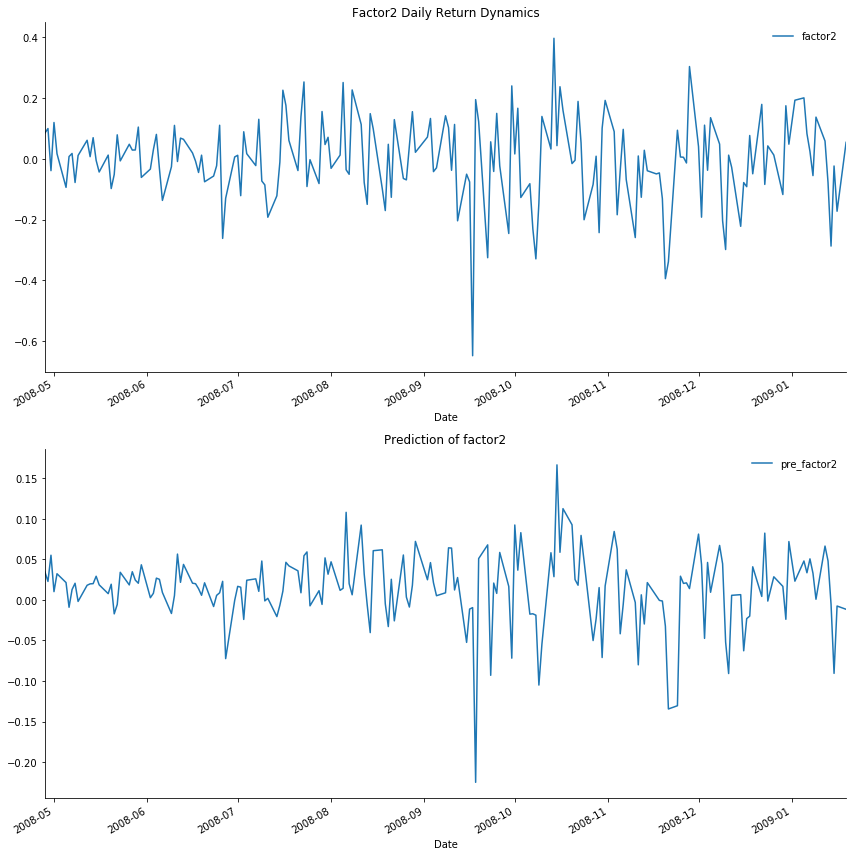

In [3]:
#factor 2
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
df_r['factor2'].plot(ax=axes[0], title='Factor2 Daily Return Dynamics')
df_r['pre_factor2'].plot(ax=axes[1], title='Prediction of factor2') 
for i in [0,1]: 
    axes[i].spines['top'].set_visible(False) 
    axes[i].spines['right'].set_visible(False)
    axes[i].legend(frameon=False);
plt.tight_layout()
plt.savefig('./output/fig/fact2prediction')

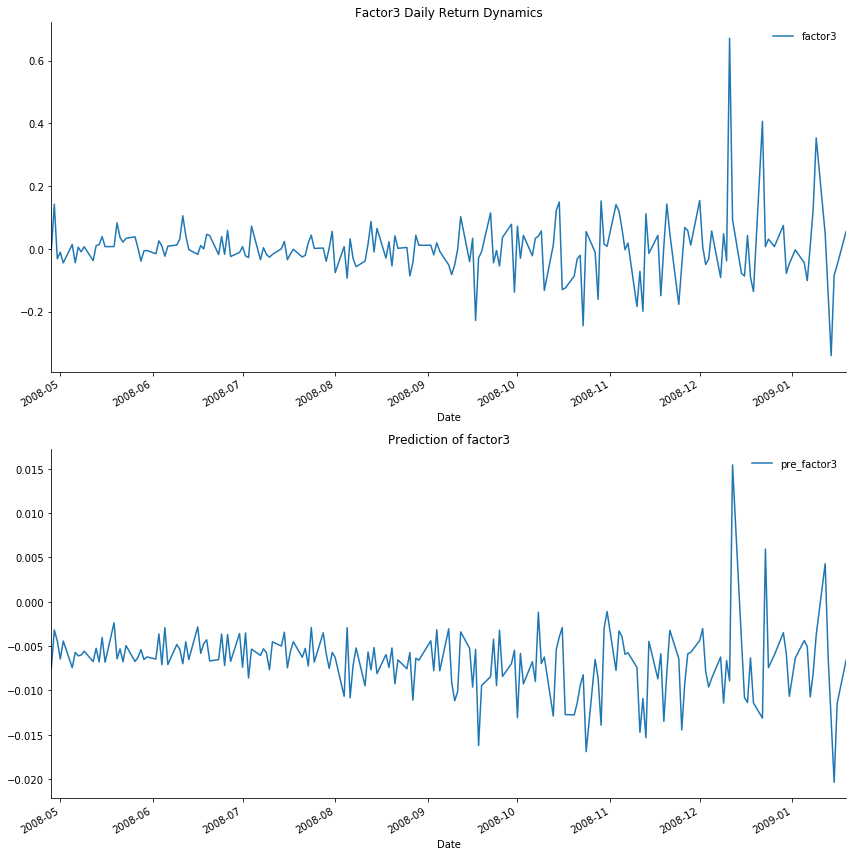

In [4]:
#factor 1 
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
df_r['factor3'].plot(ax=axes[0], title='Factor3 Daily Return Dynamics')
df_r['pre_factor3'].plot(ax=axes[1], title='Prediction of factor3') 
for i in [0,1]: 
    axes[i].spines['top'].set_visible(False) 
    axes[i].spines['right'].set_visible(False)
    axes[i].legend(frameon=False);
plt.tight_layout()
plt.savefig('./output/fig/fact3prediction')

In [5]:
for _ in df_pr.columns[1:]:
    df_r['signal_{}'.format(_)]=df_r[_]*df_r['pre_{}'.format(_)]
    
#summary 
a1=round(100*(df_r['signal_factor1']>0).sum()/len(df_r), 4)
a2=round(100*(df_r['signal_factor2']>0).sum()/len(df_r), 4)
a3=round(100*(df_r['signal_factor3']>0).sum()/len(df_r), 4)
print("Successful Rate of Factor 1: {}%".format(a1))
print("Successful Rate of Factor 2: {}%".format(a2))
print("Successful Rate of Factor 3: {}%".format(a3))
 

Successful Rate of Factor 1: 51.5957%
Successful Rate of Factor 2: 53.7234%
Successful Rate of Factor 3: 50.0%


---